In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load Data (We don't need noise)
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and Reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [3]:
# 2. Define the Autoencoder Model
input_img = Input(shape=(28, 28, 1))

# Encoder: Compresses 784 pixels -> 128 -> 64
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x) # The "compressed" representation

# Decoder: Expands 64 -> 128 -> 784 pixels
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x) # The "reconstructed" image

# Create the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
# 3. Train the Model
# We teach it to turn x_train (original) into x_train (original)
print("--- Training the simple autoencoder ---")
autoencoder.fit(
    x_train, 
    x_train,  # Note: The input and target are the same
    epochs=5,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)


--- Training the simple autoencoder ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1790 - val_loss: 0.0944
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0918 - val_loss: 0.0849
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0850 - val_loss: 0.0814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0812 - val_loss: 0.0787
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0791 - val_loss: 0.0773


In [5]:
# 4. Get Reconstructed Images
print("\n--- Reconstructing test images ---")
reconstructed_images = autoencoder.predict(x_test)



--- Reconstructing test images ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Displaying 10 sample results...
Saved comparison image to 'autoencoder_results.png'


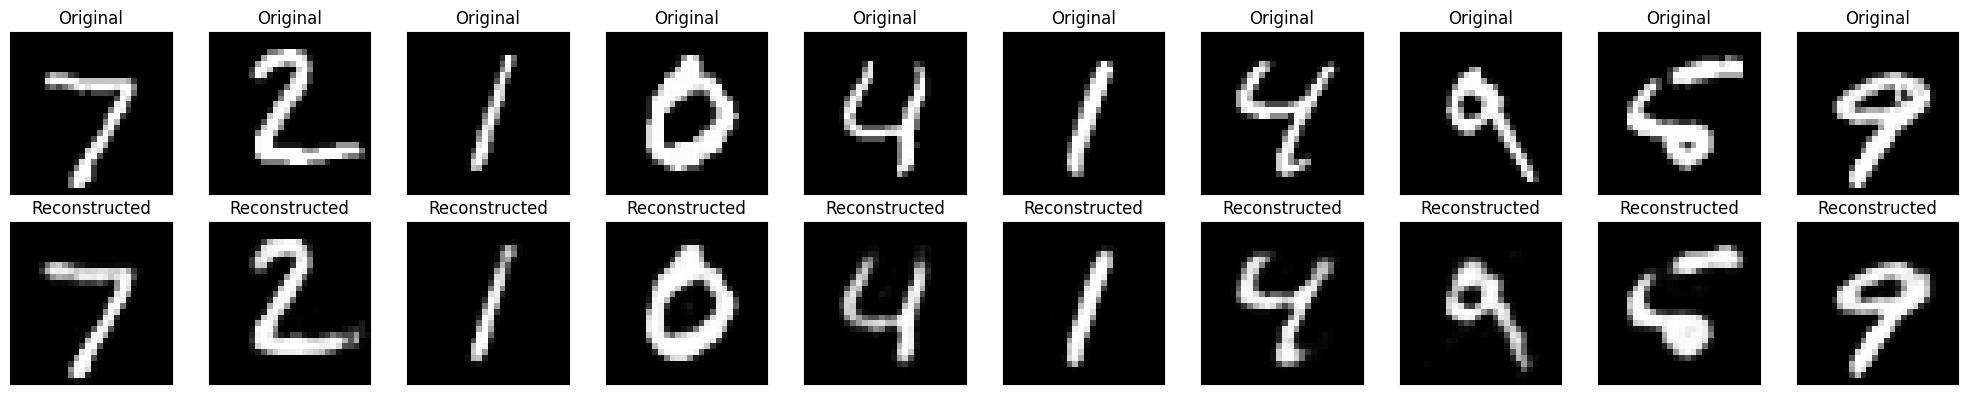

In [6]:
# 5. Display 10 Original vs. Reconstructed Images
print("Displaying 10 sample results...")
n = 10
plt.figure(figsize=(20, 4)) # 2 rows, 10 columns
for i in range(n):
    # Display Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax.set_title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.savefig('autoencoder_results.png')
print("Saved comparison image to 'autoencoder_results.png'")
plt.show()